In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-burnout-rate/predict-the-employee-burn-out-rate-7-6340b4e3/d4c937c412c011eb.zip

--2020-11-19 17:07:29--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-burnout-rate/predict-the-employee-burn-out-rate-7-6340b4e3/d4c937c412c011eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.132.88
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.132.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 401409 (392K) [application/zip]
Saving to: ‘d4c937c412c011eb.zip’

d4c937c412c011eb.zi 100%[===================>] 392.00K   396KB/s    in 1.0s    

2020-11-19 17:07:31 (396 KB/s) - ‘d4c937c412c011eb.zip’ saved [401409/401409]



In [ ]:
!unzip d4c937c412c011eb.zip

Archive:  d4c937c412c011eb.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        
  inflating: dataset/sample_submission.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
re=test['Employee ID']

In [ ]:
train.head(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
test.head(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Employee ID                0
 Date of Joining            0
 Gender                     0
 Company Type               0
 WFH Setup Available        0
 Designation                0
 Resource Allocation     1381
 Mental Fatigue Score    2117
 Burn Rate               1124
 dtype: int64, Employee ID             0
 Date of Joining         0
 Gender                  0
 Company Type            0
 WFH Setup Available     0
 Designation             0
 Resource Allocation     0
 Mental Fatigue Score    0
 dtype: int64, (22750, 9), (12250, 8), Employee ID              object
 Date of Joining          object
 Gender                   object
 Company Type             object
 WFH Setup Available      object
 Designation             float64
 Resource Allocation     float64
 Mental Fatigue Score    float64
 Burn Rate               float64
 dtype: object)

In [ ]:
#train.iloc[:,:].plot(kind='box',figsize=(50,100), subplots=True,grid=False, layout=(12, 4))

In [ ]:
train=train.dropna(subset=['Burn Rate'])
#train['Burn Rate']=train['Burn Rate'].fillna(method='ffill')

In [ ]:
#train['delll']=train['Mental Fatigue Score']
#train = train[train.delll >= 1]
#del train['delll']

In [ ]:
#train['delll']=train['Burn Rate']
#train = train[train.delll < 0.98]
#del train['delll']

In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
#df['Resource Allocation']=df['Resource Allocation'].fillna(method='bfill')
df['Resource Allocation']=df['Resource Allocation'].fillna(df['Resource Allocation'].mean())
df['Mental Fatigue Score']=df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].mean())

In [ ]:
k=['Date of Joining']
for i in k:
  df[i] = pd.to_datetime(df[i])
for i in k:
  #df[i+'_'+'year'] = df[i].dt.year
  df[i+'_'+'day'] = df[i].dt.day
  df[i+'_'+'weekofyear'] = df[i].dt.weekofyear
  df[i+'_'+'month'] = df[i].dt.month
  df[i+'_'+'dayofweek'] = df[i].dt.dayofweek
  df[i+'_'+'weekend'] = (df[i].dt.weekday >=5).astype(int)
del df['Date of Joining']

In [ ]:
df.nunique()

Employee ID                   33876
Gender                            2
Company Type                      2
WFH Setup Available               2
Designation                       6
Resource Allocation              11
Mental Fatigue Score            102
Burn Rate                       101
Date of Joining_day              31
Date of Joining_weekofyear       52
Date of Joining_month            12
Date of Joining_dayofweek         7
Date of Joining_weekend           2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender']=df['Gender']+1
df['Company Type'] = le.fit_transform(df['Company Type'])
df['Company Type']=df['Company Type']+1
df['WFH Setup Available'] = le.fit_transform(df['WFH Setup Available'])
df['WFH Setup Available']=df['WFH Setup Available']+1

In [ ]:
df['xfact']=df['Resource Allocation']*df['Mental Fatigue Score']

In [ ]:
df['xeno']=df['Designation']*df['Resource Allocation']
df['feno']=df['Designation']*df['Mental Fatigue Score']
df['red_line']=df['xfact']-(df['xeno']+df['feno'])
df['yellow_line']=df['Designation']*(df['Mental Fatigue Score']-df['Resource Allocation'])
#df['timeline']=df['Date of Joining_day']+df['Date of Joining_weekofyear']

In [ ]:
#df['Mental Fatigue Score']=df['Mental Fatigue Score']*10
#df['Mental Fatigue Score']=df['Mental Fatigue Score'].astype(int)
#df['Mental Fatigue Score'].value_counts()

In [ ]:
df['Employee_ID']=df['Employee ID']
df['Employee_ID']=df.Employee_ID.str.extract('(\d+)')
x=[]
for i in df['Employee_ID']:
  i=int(i)
  i=int(i/300000000000)
  x.append(i)
df['Employee_ID']=x
le = LabelEncoder()
df['Employee_ID'] = le.fit_transform(df['Employee_ID'])
del df['Employee ID']

In [ ]:
df.head(5)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of Joining_day,Date of Joining_weekofyear,Date of Joining_month,Date of Joining_dayofweek,Date of Joining_weekend,xfact,xeno,feno,red_line,yellow_line,Employee_ID
0,1,2,1,2.0,3.000000,3.8,0.16,30,40,9,1,0,11.400000,6.000000,7.6,-2.200000,1.600000,21
1,2,2,2,1.0,2.000000,5.0,0.36,30,48,11,6,1,10.000000,2.000000,5.0,3.000000,3.000000,8
2,1,1,2,2.0,4.474446,5.8,0.49,10,11,3,0,0,25.951788,8.948893,11.6,5.402896,2.651107,14
3,2,2,2,1.0,1.000000,2.6,0.20,3,45,11,0,0,2.600000,1.000000,2.6,-1.000000,1.600000,25
4,1,2,1,3.0,7.000000,6.9,0.52,24,30,7,3,0,48.300000,21.000000,20.7,6.600000,-0.300000,20


In [ ]:
#df.iloc[:,:-1].hist(figsize=(50,100), grid=True, layout=(12,5), bins = 30)

Gender                           AxesSubplot(0.125,0.826831;0.168478x0.053169)
Company Type                  AxesSubplot(0.327174,0.826831;0.168478x0.053169)
WFH Setup Available           AxesSubplot(0.529348,0.826831;0.168478x0.053169)
Designation                   AxesSubplot(0.731522,0.826831;0.168478x0.053169)
Resource Allocation              AxesSubplot(0.125,0.763028;0.168478x0.053169)
Mental Fatigue Score          AxesSubplot(0.327174,0.763028;0.168478x0.053169)
Burn Rate                     AxesSubplot(0.529348,0.763028;0.168478x0.053169)
Date of Joining_day           AxesSubplot(0.731522,0.763028;0.168478x0.053169)
Date of Joining_weekofyear       AxesSubplot(0.125,0.699225;0.168478x0.053169)
Date of Joining_month         AxesSubplot(0.327174,0.699225;0.168478x0.053169)
Date of Joining_dayofweek     AxesSubplot(0.529348,0.699225;0.168478x0.053169)
Date of Joining_weekend       AxesSubplot(0.731522,0.699225;0.168478x0.053169)
xfact                            AxesSubplot(0.125,0

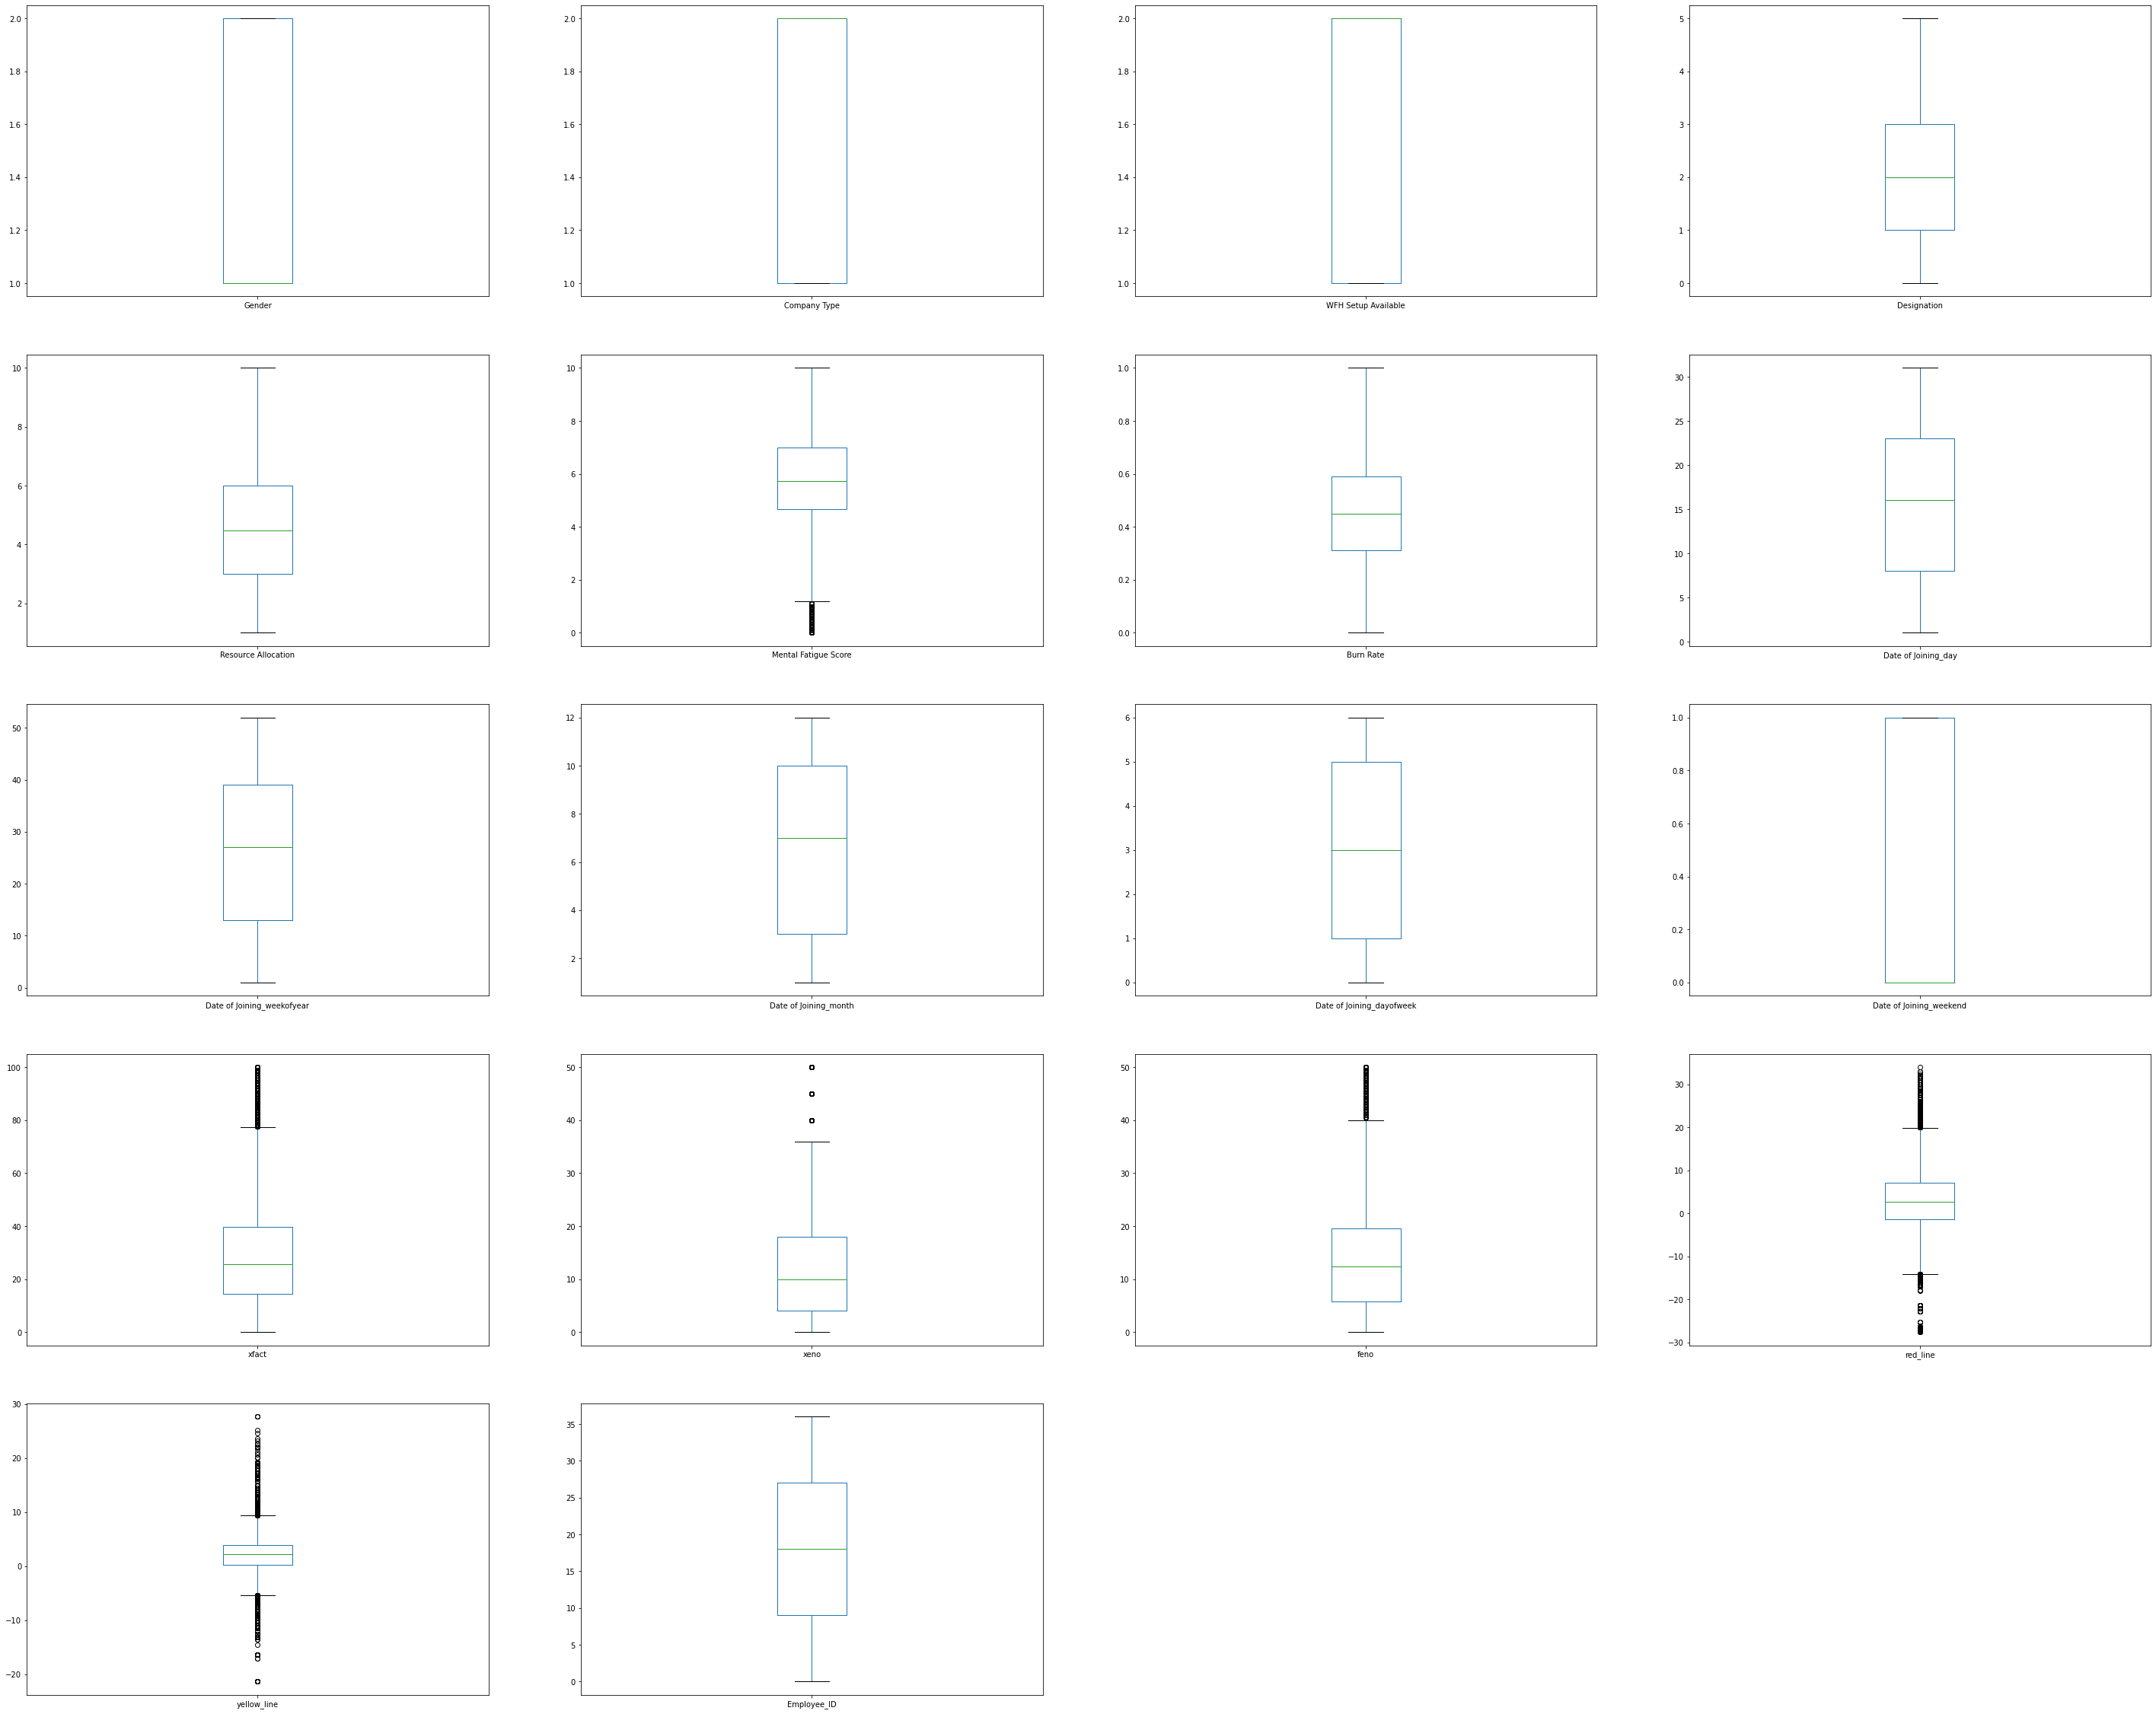

In [ ]:
## Check outliers
df.iloc[:,:].plot(kind='box',figsize=(50,100), subplots=True,grid=False, layout=(12, 4))
## Except metal fatigue, all are having outliers free, while selecting machine learning algorithm this should be taken into consideration

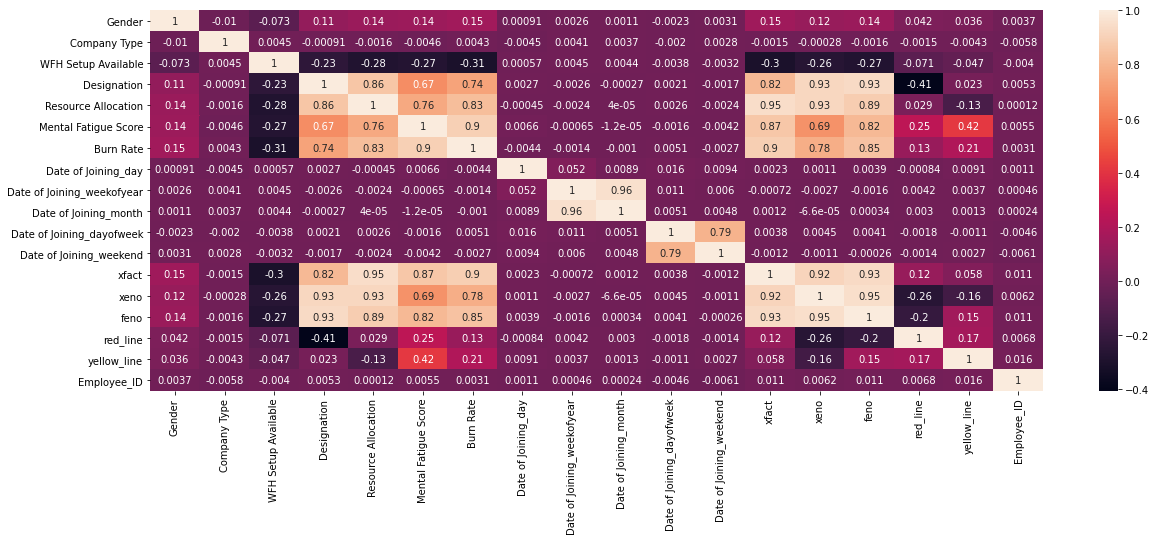

In [ ]:
##Correlation of the dataset
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

In [ ]:
train = df[df['Burn Rate'].isnull()==False]
test = df[df['Burn Rate'].isnull()==True]
del test['Burn Rate']

In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
X = train_df.drop(labels=['Burn Rate'], axis=1)
y = train_df['Burn Rate'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((19463, 17), (19463,), (2163, 17), (2163,))

In [ ]:
from math import sqrt 
from sklearn.metrics import r2_score

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 500
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', r2_score(y_cv,y_pred_lgbm))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 0.0920847
[200]	valid_0's rmse: 0.0651053
[300]	valid_0's rmse: 0.0599271
[400]	valid_0's rmse: 0.0589943
[500]	valid_0's rmse: 0.0587676
[600]	valid_0's rmse: 0.0587323
[700]	valid_0's rmse: 0.0587158
[800]	valid_0's rmse: 0.0587327
Early stopping, best iteration is:
[691]	valid_0's rmse: 0.0587079
RMSLE: 0.909186586407981


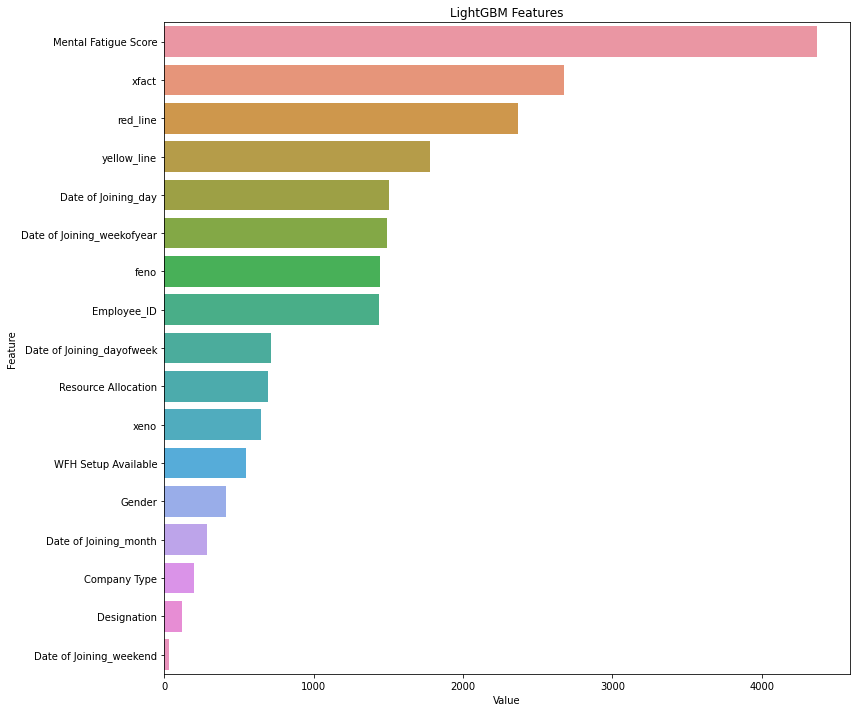

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:100], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=False, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    #lgbm = LGBMRegressor(boosting='dart',learning_rate=0.2, n_estimators=1000, random_state=42, subsample=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", r2_score(y_test, y_pred_lgbm))

    errlgb.append(r2_score(y_test,y_pred_lgbm))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9149179831342087


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9103533476580662


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9101990497533246


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9009567398782887


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9103494168970998


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9108922023533296


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9176705475738448


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9125556580672628


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9147773022000034


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9110413772801249


In [ ]:
np.mean(errlgb,0)

0.9113713624795553

In [ ]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([0.60960409, 0.35444598, 0.42851495, ..., 0.83322885, 0.57684965,
       0.13378974])

In [ ]:
submission = pd.DataFrame({
        "Employee ID":re,
        "Burn Rate":lgbm_final*1.0006
    })
submission.to_csv('./bestt.csv', index=False)
print(submission)

                    Employee ID  Burn Rate
0      fffe31003300390039003000   0.609970
1      fffe31003300310037003800   0.354659
2      fffe33003400380035003900   0.428772
3          fffe3100370039003200   0.403003
4      fffe32003600390036003700   0.532195
...                         ...        ...
12245      fffe3900310034003700   0.414304
12246  fffe32003600330034003000   0.431333
12247  fffe31003800340039003000   0.833729
12248  fffe32003600380031003800   0.577196
12249  fffe32003100390037003800   0.133870

[12250 rows x 2 columns]


In [ ]:
from google.colab import files
files.download('bestt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# gb

In [ ]:
X = train_df.drop(labels=['Burn Rate'], axis=1)
y = train_df['Burn Rate'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=500, random_state=42, subsample=0.8,min_samples_split=100,min_samples_leaf=100,max_depth=8,max_features='sqrt')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', r2_score(y_cv,y_pred))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0327           0.0067           39.78s
         2           0.0273           0.0053           39.90s
         3           0.0230           0.0044           40.52s
         4           0.0196           0.0034           39.56s
         5           0.0164           0.0030           39.50s
         6           0.0142           0.0024           39.54s
         7           0.0123           0.0019           39.29s
         8           0.0106           0.0016           38.88s
         9           0.0094           0.0012           38.49s
        10           0.0083           0.0011           38.39s
        20           0.0043           0.0001           38.45s
        30           0.0035           0.0000           38.54s
        40           0.0034           0.0000           39.58s
        50           0.0033          -0.0000           39.49s
        60           0.0033          -0.0000           39.65s
       

In [ ]:
Xtest = test_df

In [ ]:

from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.10, n_estimators=1000, random_state=42, subsample=0.9)
    #gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=650, random_state=42, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('MSE', r2_score(y_test, y_pred))

    errgb.append(r2_score(y_test,y_pred))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

MSE 0.9079301213376876
MSE 0.9098206516545589
MSE 0.9086505300153614
MSE 0.9080257668712957


In [ ]:
np.mean(errgb,0)

0.9086067674697259

In [ ]:
gb_fib = np.mean(y_pred_totgb,0)
gb_fib

array([0.597216  , 0.36085136, 0.43978522, ..., 0.8349169 , 0.58247662,
       0.13029198])

In [ ]:
submission = pd.DataFrame({
        "Employee ID": re,
        "Burn Rate":gb_fib
    })
submission.to_csv('./xcvf.csv', index=False)
print(submission)

                    Employee ID  Burn Rate
0      fffe31003300390039003000   0.597216
1      fffe31003300310037003800   0.360851
2      fffe33003400380035003900   0.439785
3          fffe3100370039003200   0.415535
4      fffe32003600390036003700   0.526289
...                         ...        ...
12245      fffe3900310034003700   0.418280
12246  fffe32003600330034003000   0.431150
12247  fffe31003800340039003000   0.834917
12248  fffe32003600380031003800   0.582477
12249  fffe32003100390037003800   0.130292

[12250 rows x 2 columns]


In [ ]:
from google.colab import files
files.download('xcvf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>